In [1]:
import pandas as pd
import math
#List of all astroids
neo_data = pd.read_csv("neo.csv")
neo_data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [3]:
#Check for unique values
neo_data.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [7]:
#drop sentry_object and orbiting body
neo_data.drop(['sentry_object','orbiting_body'], axis = 1)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [6]:
#Find the hazardous neos.
hazardous = neo_data[neo_data['hazardous'] == True]
hazardous

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
10,54049873,(2020 OT6),0.252671,0.564989,58430.697200,3.833750e+07,Earth,False,20.11,True
23,2506491,506491 (2003 UW29),0.201630,0.450858,115899.180498,1.510102e+07,Earth,False,20.60,True
27,3781344,(2017 RV),0.110804,0.247765,48655.305132,3.279775e+07,Earth,False,21.90,True
...,...,...,...,...,...,...,...,...,...,...
90782,3776295,(2017 NH),0.133216,0.297879,67595.756852,5.681059e+07,Earth,False,21.50,True
90794,54235530,(2022 AY1),0.104847,0.234444,51149.696785,5.450002e+07,Earth,False,22.02,True
90811,2138404,138404 (2000 HA24),0.356907,0.798068,33008.617883,7.189835e+07,Earth,False,19.36,True
90812,2377732,377732 (2005 XJ8),1.034082,2.312278,53362.798148,4.756627e+07,Earth,False,17.05,True


In [33]:
#What percentage of the recorded neos are hazardous?
hazardous_percentage = round(len(hazardous) / len(neo_data) * 100, 2)
str(hazardous_percentage) + "%"

'9.73%'

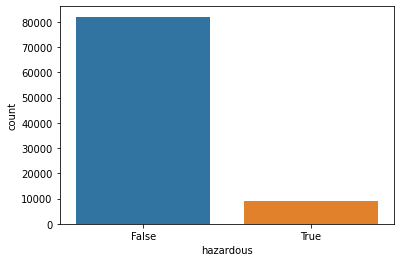

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#graph nonhazardous vs hazardous neos
sns.countplot(x = 'hazardous', data = neo_data)
plt.show()

In [19]:
#What is the average miss distance of an NEO?
distance = neo_data['miss_distance']
average_distance = sum(distance)/len(neo_data)
sn_avg_distance = "{:e}".format(average_distance)
sn_avg_distance + " km"

'3.706655e+07 km'

In [27]:
#What is the average miss distance of a harmful NEO?
distance = hazardous['miss_distance']
average_distance = sum(distance)/len(hazardous)
sn_average_distance_hazardous = "{:e}".format(average_distance)
sn_average_distance_hazardous + " km"

'3.994623e+07 km'

In [30]:
#What is the average velocity of an NEO?
velocity = neo_data['relative_velocity']
average_velocity = round(sum(velocity)/len(neo_data),6)
str(average_velocity) + " km/h"

'48066.918918 km/h'

In [37]:
#What is the average velocity of a harmful NEO?
velocity = hazardous['relative_velocity']
average_velocity_hazardous = round(sum(velocity)/len(hazardous),6)
str(average_velocity_hazardous) + " km/h"

'62794.337025 km/h'

In [35]:
#What is the average maximum estimated diameter of an NEO?
max_diameter = neo_data['est_diameter_max']
average_max_diameter = round(sum(max_diameter)/len(neo_data), 6)
str(average_max_diameter) + " km"

'0.284947 km'

In [39]:
#What is the average maximum estimated diameter of a harmful NEO?
max_diameter = hazardous['est_diameter_max']
average_max_diameter_hazardous = round(sum(max_diameter)/len(hazardous), 6)
str(average_max_diameter_hazardous) + " km"

'0.657704 km'

In [41]:
#What is the average minimum estimated diameter of an NEO?
min_diameter = neo_data['est_diameter_min']
average_min_diameter = round(sum(min_diameter)/len(neo_data), 6)
str(average_min_diameter) + " km"

'0.127432 km'

In [42]:
#What is the average minimum estimated diameter of a harmful NEO?
min_diameter = hazardous['est_diameter_min']
average_min_diameter_hazardous = round(sum(min_diameter)/len(hazardous), 6)
str(average_min_diameter_hazardous) + " km"

'0.294134 km'

In [4]:
#Summary of the Dataset
neo_data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000
